# EDA and Problem Description 

__Creator:__ Kevin

__Purpose:__ Intial EDA of the data, highlight the problem that needs to be solved

__Requirement__

* Travel to every city in the dataset once
* Every 10th stop has to be at a prime city
* Travelling from one city to another is recorded in terms of the Euclidean distance
* Winning entry is the shortest total distance is the winning answer

__Steps__
1. Read in the data
2. EDA
3. Setup the problem

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# df = pd.read_csv('Data\cities.csv') 
df = pd.read_csv('Data\cities_with_prime.csv') # Read in the data with prime number already identified

# Summary of the data

There are {{len(df)}} total rows in the dataset. These correspond to {{len(df.CityId.drop_duplicates())}} unique cities with an associated x and y coordinates. 

There are {{len(df) - len(df.loc[:,['X','Y']].drop_duplicates())}} duplicates of coordinates. Each coordinate is unique. 

In [20]:
df.head()

,CityId,X,Y,Prime
0,0,316.836739,2202.340707,0
1,1,4377.405972,336.602082,0
2,2,3454.158198,2820.053011,1
3,3,4688.099298,2935.898056,1
4,4,1010.696952,3236.750989,0


# EDA

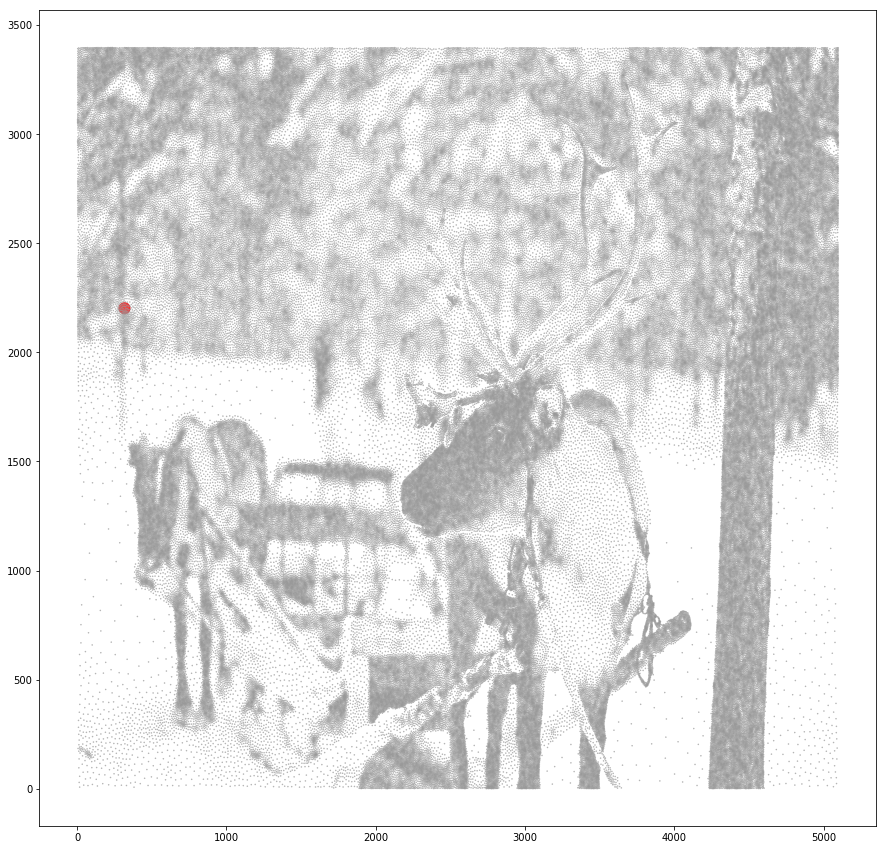

In [25]:
# Scatter plot of the data
fig = plt.figure(figsize=(15,15))
plt.scatter(df['X'], df['Y'], marker = '.', c=(df.CityId != 0).astype(int), 
            cmap='Set1', alpha = 0.8, s = 500*(df.CityId == 0).astype(int)+1)
plt.show()

Nice surprise that the coordinates plot out the above image. In this image, the red point is the first city in the dataset, assumed to be the North Pole. 

This data is missing an identifier for the prime numbers. First thing we should do is to create an inicator in the dataset showing that. 

In [16]:
def prime_function(num):
    ''' Function is slow so best to use once and output the resulting data as a csv'''
    if num > 1:
       # check for factors
       for i in range(2,num):
           if (num % i) == 0:
               return 0
       else:
           return 1

    # if input number is less than or equal to 1, it is not prime
    else:
       return 0

In [21]:
# # Create an indicator to show if the Prime city or not
# df['Prime'] = df.CityId.apply(prime_function)

# # Output the data to save run time
# df.to_csv('Data\cities_with_prime.csv', index=False)

In [22]:
# Isolating prime cities
prime_cities = df.query('Prime == 1')

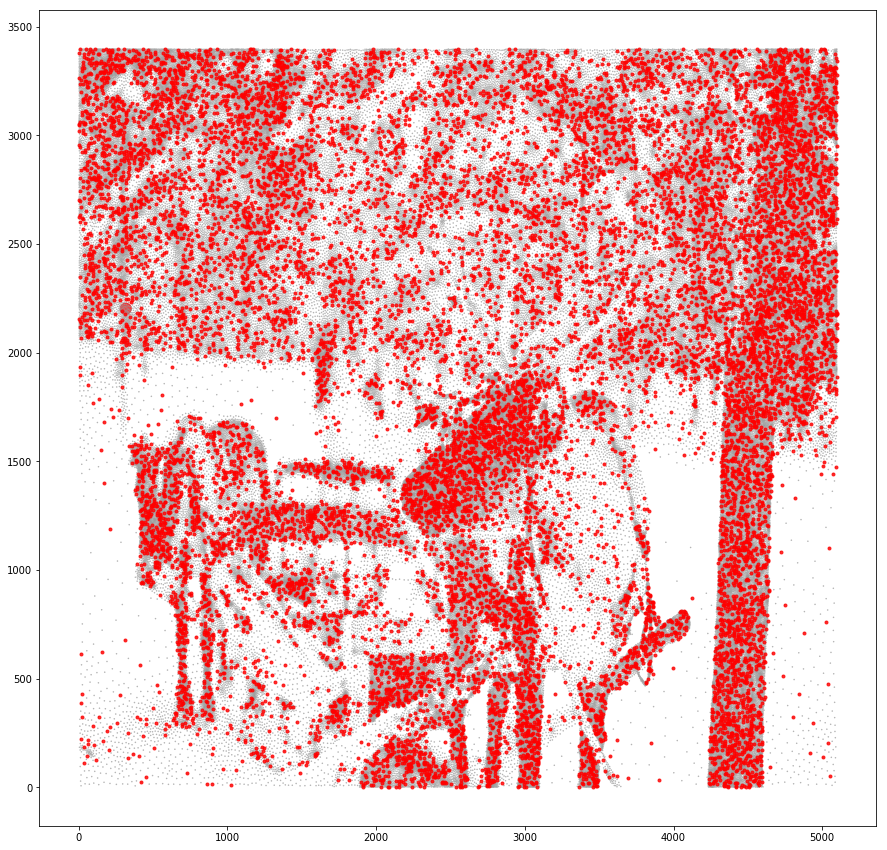

In [26]:
# Re-doing a plot of the same data as above -including a prime identifier
fig = plt.figure(figsize=(15,15))
plt.scatter(df['X'], df['Y'], marker = '.', c=(df.CityId != 0).astype(int), 
            cmap='Set1', alpha = 0.8, s = 500*(df.CityId == 0).astype(int)+1)
plt.scatter(prime_cities['X'], prime_cities['Y'], marker = '.', color='r', alpha = 0.8)
plt.show()